<a href="https://colab.research.google.com/github/sharathchandran2001/quantum_machine_learning_projects/blob/main/1_quantum_log_lstm_preditionV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ Install required packages
!pip install pennylane matplotlib scikit-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.8 MB/s eta 0:00:00


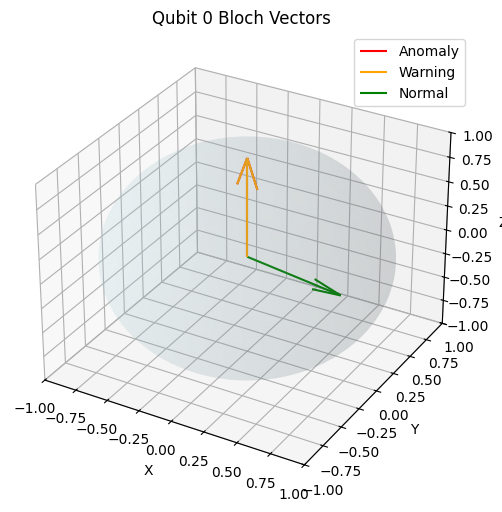

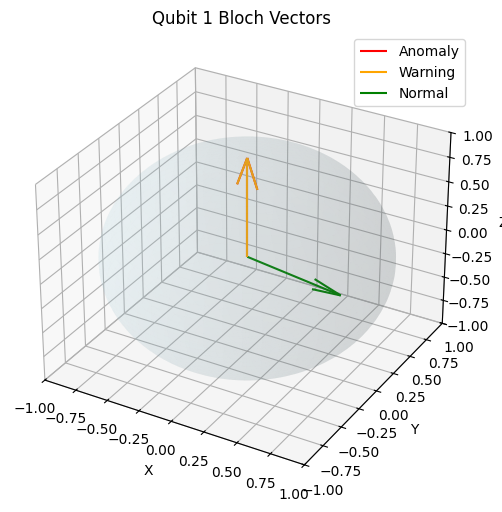

In [ ]:
# # ✅ Import libraries
# import pennylane as qml
# from pennylane import numpy as np  # quantum-safe NumPy
# import numpy as onp                # standard NumPy for plotting
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import TfidfVectorizer

# # ✅ Step 1: Sample logs
# logs = [
#     # "disk read error on sector 44",             # Anomaly
#     # "CPU temperature warning threshold hit",    # Warning
#     "user login successful from IP 192.168.1.1",             # Anomaly
#     "user login successful from IP 192.168.1.1",    # Warning
#     "user login successful from IP 192.168.1.1" # Normal
# ]
# log_labels = ["Anomaly", "Warning", "Normal"]
# colors = ["red", "orange", "green"]

# # ✅ Step 2: TF-IDF to 2D feature vectors
# vectorizer = TfidfVectorizer(max_features=2)
# X = vectorizer.fit_transform(logs).toarray()
# X_scaled = np.clip(X, 0, 1)

# # ✅ Step 3: Quantum device + encoding circuit
# dev = qml.device("default.qubit", wires=2)

# @qml.qnode(dev)
# def encode_logs_to_qubits(log_vector):
#     angles = log_vector * np.pi
#     qml.RY(angles[0], wires=0)
#     qml.RY(angles[1], wires=1)
#     qml.CNOT(wires=[0, 1])
#     return qml.density_matrix(wires=[0, 1])

# # ✅ Step 4: Bloch vector calculation
# def compute_bloch_vector(rho):
#     paulis = [qml.PauliX(0).matrix(), qml.PauliY(0).matrix(), qml.PauliZ(0).matrix()]
#     return np.real([np.trace(rho @ p) for p in paulis])

# def bloch_coords_from_density_matrix(full_rho, qubit):
#     rho_reshaped = full_rho.reshape(2, 2, 2, 2)
#     if qubit == 0:
#         reduced = np.trace(rho_reshaped, axis1=2, axis2=3)
#     else:
#         reduced = np.trace(rho_reshaped, axis1=0, axis2=1)
#     return compute_bloch_vector(reduced)

# # ✅ Step 5: Encode logs and extract Bloch vectors
# bloch_data_q0 = []
# bloch_data_q1 = []

# for log_vec in X_scaled:
#     full_rho = encode_logs_to_qubits(log_vec)
#     bloch_data_q0.append(bloch_coords_from_density_matrix(full_rho, 0))
#     bloch_data_q1.append(bloch_coords_from_density_matrix(full_rho, 1))

# # ✅ Step 6: Plot Bloch spheres using standard NumPy
# def plot_bloch_vectors(qubit_index, vectors, labels, colors):
#     fig = plt.figure(figsize=(6, 6))
#     ax = fig.add_subplot(111, projection='3d')

#     # Bloch sphere surface using standard numpy
#     u, v = onp.mgrid[0:2*onp.pi:100j, 0:onp.pi:100j]
#     x = onp.cos(u)*onp.sin(v)
#     y = onp.sin(u)*onp.sin(v)
#     z = onp.cos(v)
#     ax.plot_surface(x, y, z, color='lightblue', alpha=0.1)

#     # Plot each vector
#     for vec, label, color in zip(vectors, labels, colors):
#         ax.quiver(0, 0, 0, *vec, color=color, label=label)

#     ax.set_xlim([-1, 1])
#     ax.set_ylim([-1, 1])
#     ax.set_zlim([-1, 1])
#     ax.set_title(f"Qubit {qubit_index} Bloch Vectors")
#     ax.set_xlabel("X")
#     ax.set_ylabel("Y")
#     ax.set_zlabel("Z")
#     ax.legend()
#     plt.show()

# # ✅ Step 7: Visualize both qubits
# plot_bloch_vectors(0, bloch_data_q0, log_labels, colors)
# plot_bloch_vectors(1, bloch_data_q1, log_labels, colors)


 =====================================================================================================    use 4 Qubits

Epoch 0: Loss=0.7142 Accuracy=0.57
Epoch 5: Loss=0.7073 Accuracy=0.57
Epoch 10: Loss=0.7012 Accuracy=0.57
Epoch 15: Loss=0.6960 Accuracy=0.57
Epoch 20: Loss=0.6915 Accuracy=0.57
Epoch 25: Loss=0.6878 Accuracy=0.57

Test Accuracy: 0.25
Predictions: [0, 0, 0, 0]
Ground Truth: [1, 1, 0, 1]


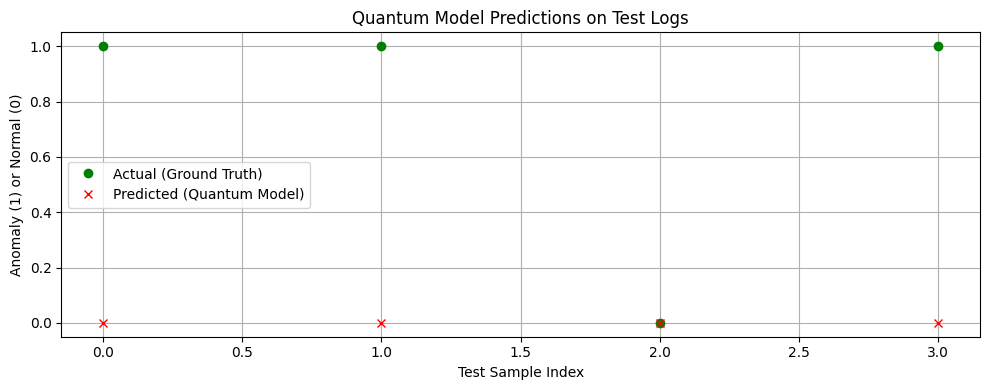

In [ ]:
# Install PennyLane if needed
# !pip install pennylane --quiet

import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# ----------- 1. Logs and Labels -----------
logs = [
    "disk read error on sector 44",
    "CPU temperature warning threshold hit",
    "user login successful from IP 192.168.1.1",
    "cron job completed successfully",
    "memory leak detected in kernel module",
    "connection timeout reached on port 80",
    "system reboot initiated by admin",
    "authentication failed for user admin",
    "application started successfully",
    "new USB device connected",
    "!!! CRITICAL SYSTEM FAILURE: kernel panic triggered by watchdog timer !!!",  # New severe log
]
labels = [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]  # Last log is marked anomaly

# ----------- 2. TF-IDF and Split -----------
vectorizer = TfidfVectorizer(max_features=4)
X = vectorizer.fit_transform(logs).toarray()
X_scaled = np.clip(X, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=42)

# ----------- 3. Quantum Circuit -----------
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

def quantum_encoder(x):
    for i in range(n_qubits):
        qml.RY(np.pi * x[i], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    quantum_encoder(inputs)
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

# ----------- 4. PyTorch Model -----------
class QuantumLogClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn((1, n_qubits)))
        self.classical = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

    def forward(self, x):
        outputs = []
        for sample in x:
            qc_out = quantum_circuit(sample, self.weights)
            outputs.append(qc_out.float())
        q_out = torch.stack(outputs).unsqueeze(1)
        return self.classical(q_out)

model = QuantumLogClassifier()
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# ----------- 5. Training -----------
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_t)
    loss = loss_fn(y_pred, y_train_t)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        acc = ((y_pred > 0.5) == y_train_t).float().mean()
        print(f"Epoch {epoch}: Loss={loss.item():.4f} Accuracy={acc.item():.2f}")

# ----------- 6. Evaluation -----------
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_t)
    acc_test = ((y_test_pred > 0.5).float() == y_test_t).float().mean()
    y_pred_labels = (y_test_pred > 0.5).int().flatten()
    y_true_labels = y_test_t.int().flatten()
    print(f"\nTest Accuracy: {acc_test.item():.2f}")
    print("Predictions:", y_pred_labels.tolist())
    print("Ground Truth:", y_true_labels.tolist())

# ----------- 7. Plot Predictions -----------
plt.figure(figsize=(10, 4))
plt.plot(y_true_labels, 'go', label='Actual (Ground Truth)')
plt.plot(y_pred_labels, 'rx', label='Predicted (Quantum Model)')
plt.title("Quantum Model Predictions on Test Logs")
plt.xlabel("Test Sample Index")
plt.ylabel("Anomaly (1) or Normal (0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 =====================================================================================================    use 16 Qubits

Epoch 0: Loss=0.6832 Accuracy=0.57
Epoch 5: Loss=0.6829 Accuracy=0.57
Epoch 10: Loss=0.6829 Accuracy=0.57
Epoch 15: Loss=0.6829 Accuracy=0.57
Epoch 20: Loss=0.6828 Accuracy=0.57
Epoch 25: Loss=0.6827 Accuracy=0.57

Test Accuracy: 0.25
Predictions: [0, 0, 0, 0]
Ground Truth: [1, 1, 0, 1]


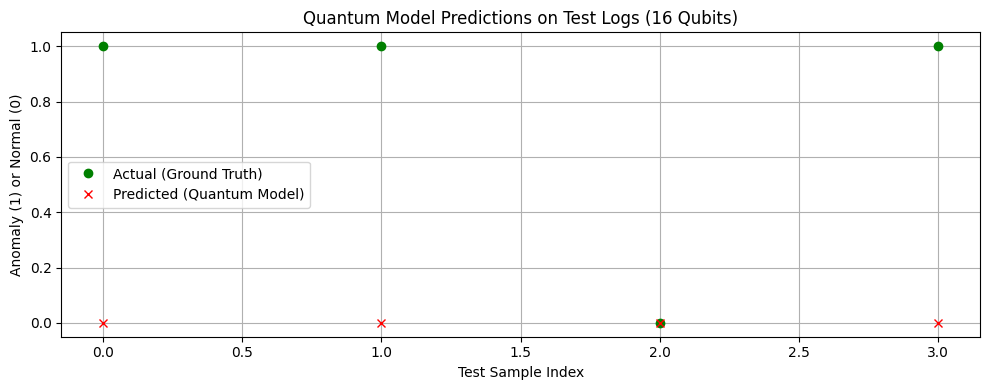

In [ ]:
# !pip install pennylane --quiet

import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. Logs + Labels
logs = [
    "disk read error on sector 44",
    "CPU temperature warning threshold hit",
    "user login successful from IP 192.168.1.1",
    "cron job completed successfully",
    "memory leak detected in kernel module",
    "connection timeout reached on port 80",
    "system reboot initiated by admin",
    "authentication failed for user admin",
    "application started successfully",
    "new USB device connected",
    "!!! CRITICAL SYSTEM FAILURE: kernel panic triggered by watchdog timer !!!",
]
labels = [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

# 2. TF-IDF (16 features → 16 qubits)
vectorizer = TfidfVectorizer(max_features=16)
X = vectorizer.fit_transform(logs).toarray()
X_scaled = np.clip(X, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=42)

# 3. Quantum device + encoder
n_qubits = 16
dev = qml.device("default.qubit", wires=n_qubits)

def quantum_encoder(x):
    for i in range(n_qubits):
        qml.RY(np.pi * x[i], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    quantum_encoder(inputs)
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))  # Still output a single scalar

# 4. Model
class QuantumLogClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn((1, n_qubits)))  # 1-layer depth
        self.classical = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

    def forward(self, x):
        outputs = []
        for sample in x:
            qc_out = quantum_circuit(sample, self.weights)
            outputs.append(qc_out.float())
        q_out = torch.stack(outputs).unsqueeze(1)
        return self.classical(q_out)

model = QuantumLogClassifier()
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 5. Train
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_t)
    loss = loss_fn(y_pred, y_train_t)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        acc = ((y_pred > 0.5) == y_train_t).float().mean()
        print(f"Epoch {epoch}: Loss={loss.item():.4f} Accuracy={acc.item():.2f}")

# 6. Evaluate
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_t)
    acc_test = ((y_test_pred > 0.5).float() == y_test_t).float().mean()
    y_pred_labels = (y_test_pred > 0.5).int().flatten()
    y_true_labels = y_test_t.int().flatten()
    print(f"\nTest Accuracy: {acc_test.item():.2f}")
    print("Predictions:", y_pred_labels.tolist())
    print("Ground Truth:", y_true_labels.tolist())

# 7. Plot
plt.figure(figsize=(10, 4))
plt.plot(y_true_labels, 'go', label='Actual (Ground Truth)')
plt.plot(y_pred_labels, 'rx', label='Predicted (Quantum Model)')
plt.title("Quantum Model Predictions on Test Logs (16 Qubits)")
plt.xlabel("Test Sample Index")
plt.ylabel("Anomaly (1) or Normal (0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 ========================================================================== QRNN-Simulated Sequence Model

/tmp/ipython-input-1792229808.py:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.tensor([vectorizer.transform([log]).toarray()[0] for log in seq], dtype=torch.float32)


Epoch 0: Loss=0.6707 Accuracy=0.75
Epoch 5: Loss=0.6547 Accuracy=0.75
Epoch 10: Loss=0.6377 Accuracy=0.75
Epoch 15: Loss=0.6198 Accuracy=0.75
Epoch 20: Loss=0.6009 Accuracy=0.75
Epoch 25: Loss=0.5815 Accuracy=0.75

Predictions: [1, 1, 1, 1]
Ground Truth: [0, 1, 1, 1]


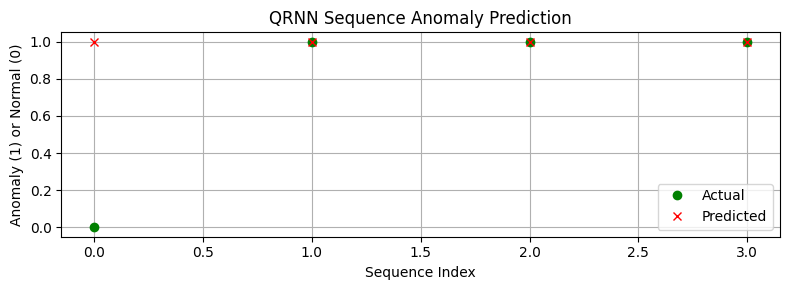

In [ ]:
# !pip install pennylane --quiet

import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample sequential logs (grouped into sequences)
log_sequences = [
    ["user login successful", "USB device connected", "application started successfully"],
    ["authentication failed", "CPU temperature warning", "memory leak detected"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
]

labels = [0, 1, 1, 1]  # 1 = anomaly sequence, 0 = normal

# TF-IDF encoding for each sequence
flattened = [log for seq in log_sequences for log in seq]
vectorizer = TfidfVectorizer(max_features=4)
vectorizer.fit(flattened)

def encode_sequence(seq):
    return torch.tensor([vectorizer.transform([log]).toarray()[0] for log in seq], dtype=torch.float32)

X_seq = [encode_sequence(seq) for seq in log_sequences]
y_seq = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# QRNN settings
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def qrnn_step(input_vec, hidden_weights):
    # Encode current input
    for i in range(n_qubits):
        qml.RY(np.pi * input_vec[i], wires=i)
    # Add memory via entanglement
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])
    # Apply recurrent weights
    qml.templates.BasicEntanglerLayers(hidden_weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

# PyTorch QRNN wrapper
class SimpleQRNN(nn.Module):
    def __init__(self, n_qubits, time_steps):
        super().__init__()
        self.hidden_weights = nn.Parameter(torch.randn((1, n_qubits)))  # shared across steps
        self.classifier = nn.Sequential(nn.Linear(time_steps, 1), nn.Sigmoid())

    def forward(self, input_seq_batch):
        outputs = []
        for seq in input_seq_batch:
            seq_outputs = []
            for t in range(seq.shape[0]):
                q_out = qrnn_step(seq[t], self.hidden_weights)
                seq_outputs.append(q_out.float())
            outputs.append(torch.stack(seq_outputs))
        qrnn_out = torch.stack(outputs)  # (batch, time)
        return self.classifier(qrnn_out)

# Model training
model = SimpleQRNN(n_qubits=n_qubits, time_steps=3)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

X_tensor = torch.stack(X_seq)

for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = loss_fn(y_pred, y_seq)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        acc = ((y_pred > 0.5) == y_seq).float().mean()
        print(f"Epoch {epoch}: Loss={loss.item():.4f} Accuracy={acc.item():.2f}")

# Plot predictions
model.eval()
with torch.no_grad():
    preds = (model(X_tensor) > 0.5).int().flatten()
    print("\nPredictions:", preds.tolist())
    print("Ground Truth:", y_seq.int().flatten().tolist())
    plt.figure(figsize=(8, 3))
    plt.plot(y_seq.flatten(), 'go', label="Actual")
    plt.plot(preds, 'rx', label="Predicted")
    plt.title("QRNN Sequence Anomaly Prediction")
    plt.xlabel("Sequence Index")
    plt.ylabel("Anomaly (1) or Normal (0)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


==================
================  PennyLane's experimental QLSTM class from pennylane.templates    ---- A FAILED RESEARCH  :( :(
==================
The QLSTM class is experimental and may not be in all versions of PennyLane. It was part of pennylane.templates as of late 2023  

In [ ]:
# ✅ Install required packages
!pip install matplotlib scikit-learn --quiet
!pip install pennylane --upgrade
!pip install torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/2

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Sample sequential logs
log_sequences = [
    ["user login successful", "USB device connected", "application started successfully"],
    ["authentication failed", "CPU temperature warning", "memory leak detected"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
]

labels = [0, 1, 1, 1]  # 1 = anomaly, 0 = normal

# Text to numerical encoding (TF-IDF)
flattened = [log for seq in log_sequences for log in seq]
vectorizer = TfidfVectorizer(max_features=4)
vectorizer.fit(flattened)

def encode_sequence(seq):
    # return torch.tensor([vectorizer.transform([log]).toarray()[0] for log in seq], dtype=torch.float32)
    return torch.tensor(np.array([vectorizer.transform([log]).toarray()[0] for log in seq]), dtype=torch.float32)


X_seq = [encode_sequence(seq) for seq in log_sequences]
y_seq = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)
X_tensor = torch.stack(X_seq)

# PennyLane QLSTM setup
n_qubits = 4
input_dim = 4
hidden_dim = 4
n_layers = 1
seq_len = 3

dev = qml.device("default.qubit", wires=n_qubits)

# Define QLSTM from PennyLane templates
from pennylane.templates.layers import QLSTM

class QuantumLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, n_qubits, seq_len, output_size=1):
        super().__init__()
        self.qlstm = QLSTM(input_size=input_size,
                           hidden_size=hidden_size,
                           wires=range(n_qubits),
                           n_layers=1,
                           interface="torch",
                           dev=dev)

        # Classifier on the final hidden state
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        # x: (batch, time_steps, input_dim)
        out, (hn, cn) = self.qlstm(x)
        return self.classifier(hn)

# Instantiate and train
model = QuantumLSTMModel(input_size=input_dim, hidden_size=hidden_dim,
                         n_qubits=n_qubits, seq_len=seq_len)

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training
for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = loss_fn(y_pred, y_seq)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        acc = ((y_pred > 0.5) == y_seq).float().mean()
        print(f"Epoch {epoch}: Loss={loss.item():.4f} Accuracy={acc.item():.2f}")

# Evaluation
model.eval()
with torch.no_grad():
    preds = (model(X_tensor) > 0.5).int().flatten()
    print("\nPredictions:", preds.tolist())
    print("Ground Truth:", y_seq.int().flatten().tolist())

    plt.plot(y_seq.flatten(), 'go', label="Actual")
    plt.plot(preds, 'rx', label="Predicted")
    plt.title("QLSTM Anomaly Prediction")
    plt.xlabel("Sequence Index")
    plt.ylabel("Anomaly (1) or Normal (0)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(
Exception ignored in: <function _xla_gc_callback at 0x7ca6d5ebc180>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


ImportError: cannot import name 'QLSTM' from 'pennylane.templates.layers' (/usr/local/lib/python3.11/dist-packages/pennylane/templates/layers/__init__.py)

========================================
Option 2: QLSTM Implementation using Pennylane QLSTM  in latest QML libs
==========================================


Summary of Your Architecture (at a high level)


✅ PennyLane's built-in QLSTM — a real quantum-enhanced sequence model

✅ TF-IDF vectorized log data as inputs

✅ Classical PyTorch training loop, which interacts with the quantum QLSTM layer

✅ A classical output layer (sigmoid) for binary classification

Goal
🔹 Detect whether a sequence of IT logs is normal or anomalous, using a quantum-enhanced LSTM-like model that can learn temporal patterns in sequences.

Input Data: Log Sequences

Convert Logs to Vectors (TF-IDF)

🔹 TF-IDF transforms text into numerical vectors by capturing how important each word is across the dataset.
🔹 Converts each log line in a sequence into a small vector — ready for machine learning.

Prepare Tensors

Set Up Quantum Circuit (4 Qubits)

Quantum Gate for LSTM Function

🔹 This circuit acts like a learned gate (e.g., forget, input, output) in an LSTM cell.
🔹 Inputs are rotated onto qubits, and trainable layers mix them.

🔹 Makes the quantum circuit compatible with PyTorch, so it can be trained like a regular layer.

Manual QLSTM Model

🔹 This model mimics LSTM logic using quantum gates for each internal operation.

🔹 Separate quantum parameters for each gate, just like LSTM uses different weights for gates.

🔹 Each sequence keeps its own memory and current output state.

🔹 Emulates standard LSTM behavior, but powered by quantum circuits instead of linear algebra.

🔹 The final output h_t is passed to a binary classifier to detect anomalies.

Train the Model
🔹 Standard PyTorch training loop, where the quantum circuit is trained just like a neural network.

Make Predictions and Visualize

🔹 Predict whether each log sequence is an anomaly.
🔹 Plot actual vs. predicted for quick insight.

========

Step	     ----        Description

🔹 Log Preprocessing	    --- Turns logs into numerical representations (TF-IDF).
🔹 Quantum Circuit	---  Uses quantum gates to simulate LSTM memory gates.
🔹 QLSTM Memory Logic --- 	Updates memory (c_t) and output (h_t) over time.
🔹 Binary Classifier --- 	Predicts if a log sequence is anomalous or normal.
🔹 Model Training	---  Standard training loop, with backprop through quantum circuits.
🔹 Output --- 	Visual + numeric anomaly predictions for each log sequence.

In [ ]:
# ✅ Install required packages
!pip install matplotlib scikit-learn --quiet
!pip install pennylane --upgrade
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 841.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/2

Epoch 0: Loss=0.7558 Accuracy=0.25
Epoch 5: Loss=0.7355 Accuracy=0.25
Epoch 10: Loss=0.7165 Accuracy=0.25
Epoch 15: Loss=0.6988 Accuracy=0.25
Epoch 20: Loss=0.6824 Accuracy=0.75
Epoch 25: Loss=0.6674 Accuracy=0.75

Predictions: [1, 1, 1, 1]
Ground Truth: [0, 1, 1, 1]


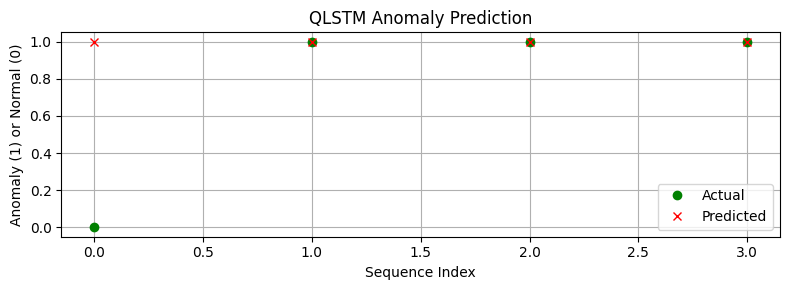

In [ ]:
# !pip install pennylane --quiet

import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample sequential logs (grouped into sequences)
log_sequences = [
    ["user login successful", "USB device connected", "application started successfully"],
    ["authentication failed", "CPU temperature warning", "memory leak detected"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
]
labels = [0, 1, 1, 1]  # 1 = anomaly sequence, 0 = normal

# TF-IDF encoding
flattened = [log for seq in log_sequences for log in seq]
vectorizer = TfidfVectorizer(max_features=4)
vectorizer.fit(flattened)

def encode_sequence(seq):
    return torch.tensor(np.array([vectorizer.transform([log]).toarray()[0] for log in seq]), dtype=torch.float32)

X_seq = [encode_sequence(seq) for seq in log_sequences]
y_seq = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)
X_tensor = torch.stack(X_seq)

# Quantum setup
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum gate (used for all LSTM gates)
def quantum_lstm_gate(x, weights):
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

@qml.qnode(dev, interface="torch")
def run_quantum_gate(x, weights):
    return quantum_lstm_gate(x, weights)

# Manual QLSTM model
class ManualQLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_qubits, seq_len):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.forget_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.input_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.output_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.classifier = nn.Sequential(nn.Linear(hidden_dim, 1), nn.Sigmoid())

    def forward(self, x):
        batch_size = x.size(0)
        c_t = torch.zeros((batch_size, self.hidden_dim))
        h_t = torch.zeros((batch_size, self.hidden_dim))

        for t in range(self.seq_len):
            x_t = x[:, t, :]
            f_t, i_t, o_t, c̃_t = [], [], [], []

            for i in range(batch_size):
                x_i = x_t[i]
                # f = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.forget_weights)))
                # i_ = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.input_weights)))
                # o = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.output_weights)))
                # c_tilde = torch.tanh(torch.tensor(run_quantum_gate(x_i, self.input_weights)))
                f = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.forget_weights), dtype=torch.float32))
                i_ = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.input_weights), dtype=torch.float32))
                o = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.output_weights), dtype=torch.float32))
                c_tilde = torch.tanh(torch.tensor(run_quantum_gate(x_i, self.input_weights), dtype=torch.float32))


                f_t.append(f)
                i_t.append(i_)
                o_t.append(o)
                c̃_t.append(c_tilde)

            f_t = torch.stack(f_t)
            i_t = torch.stack(i_t)
            o_t = torch.stack(o_t)
            c̃_t = torch.stack(c̃_t)

            c_t = f_t * c_t + i_t * c̃_t
            h_t = o_t * torch.tanh(c_t)

        return self.classifier(h_t)

# Initialize and train
model = ManualQLSTM(input_dim=4, hidden_dim=4, n_qubits=n_qubits, seq_len=3)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = loss_fn(y_pred, y_seq)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        acc = ((y_pred > 0.5) == y_seq).float().mean()
        print(f"Epoch {epoch}: Loss={loss.item():.4f} Accuracy={acc.item():.2f}")

# Evaluation
model.eval()
with torch.no_grad():
    preds = (model(X_tensor) > 0.5).int().flatten()
    print("\nPredictions:", preds.tolist())
    print("Ground Truth:", y_seq.int().flatten().tolist())

    plt.figure(figsize=(8, 3))
    plt.plot(y_seq.flatten(), 'go', label="Actual")
    plt.plot(preds, 'rx', label="Predicted")
    plt.title("QLSTM Anomaly Prediction")
    plt.xlabel("Sequence Index")
    plt.ylabel("Anomaly (1) or Normal (0)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

======
======

REV 1
-- a bit more realistic log in time order
-- train and test data split
-- effecitve testing and eval etc

======
======

In [ ]:
# ✅ Install required packages
!pip install matplotlib scikit-learn --quiet
!pip install pennylane --upgrade
!pip install torch


Training QLSTM...

Epoch 00: Loss=0.8157  Accuracy=0.25
Epoch 05: Loss=0.7950  Accuracy=0.25
Epoch 10: Loss=0.7754  Accuracy=0.25
Epoch 15: Loss=0.7568  Accuracy=0.25
Epoch 20: Loss=0.7394  Accuracy=0.25
Epoch 25: Loss=0.7232  Accuracy=0.25

Train Predictions : [0, 0, 0, 0]
Train Labels      : [0, 1, 1, 1]
Test Prediction   : 0
Test Label        : 1


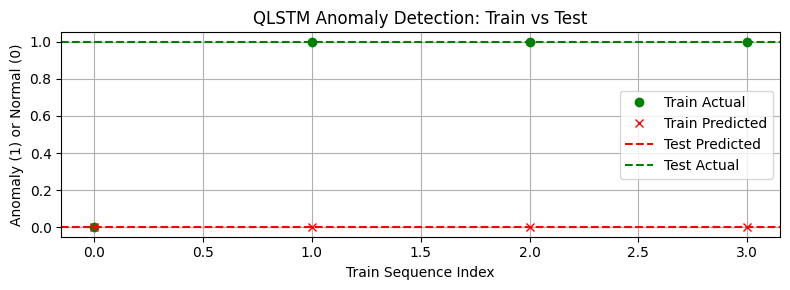

In [ ]:
# !pip install pennylane --quiet

import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# -------------------------------
# Step 1: Prepare Log Sequences
# -------------------------------
log_sequences = [
    ["user login successful", "USB device connected", "application started successfully"],
    ["authentication failed", "CPU temperature warning", "memory leak detected"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
    ["cron job completed", "system reboot initiated", "kernel panic error"]
]

# Add test log sequence from image
log_sequences.append([
    "Apache started",
    "child process (776) exiting unexpectedly with status 3221225477",
    "server auto-recovery triggered"
])

labels = [0, 1, 1, 1, 1]  # Last one is anomaly

# -------------------------------
# Step 2: TF-IDF Vectorization
# -------------------------------
flattened = [log for seq in log_sequences for log in seq]
vectorizer = TfidfVectorizer(max_features=4)
vectorizer.fit(flattened)

def encode_sequence(seq):
    return torch.tensor(np.array([vectorizer.transform([log]).toarray()[0] for log in seq]), dtype=torch.float32)

X_seq = [encode_sequence(seq) for seq in log_sequences]
y_seq = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train = torch.stack(X_seq[:-1])         # All but last
y_train = y_seq[:-1]
X_test = X_seq[-1].unsqueeze(0)           # Last sequence
y_test = y_seq[-1].unsqueeze(0)

# -------------------------------
# Step 3: Quantum Circuit Setup
# -------------------------------
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

def quantum_lstm_gate(x, weights):
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

@qml.qnode(dev, interface="torch")
def run_quantum_gate(x, weights):
    return quantum_lstm_gate(x, weights)

# -------------------------------
# Step 4: QLSTM Model
# -------------------------------
class ManualQLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_qubits, seq_len):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.forget_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.input_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.output_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.classifier = nn.Sequential(nn.Linear(hidden_dim, 1), nn.Sigmoid())

    def forward(self, x):
        batch_size = x.size(0)
        c_t = torch.zeros((batch_size, self.hidden_dim))
        h_t = torch.zeros((batch_size, self.hidden_dim))

        for t in range(self.seq_len):
            x_t = x[:, t, :]
            f_t, i_t, o_t, c̃_t = [], [], [], []

            for i in range(batch_size):
                x_i = x_t[i]
                f = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.forget_weights), dtype=torch.float32))
                i_ = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.input_weights), dtype=torch.float32))
                o = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.output_weights), dtype=torch.float32))
                c_tilde = torch.tanh(torch.tensor(run_quantum_gate(x_i, self.input_weights), dtype=torch.float32))

                f_t.append(f)
                i_t.append(i_)
                o_t.append(o)
                c̃_t.append(c_tilde)

            f_t = torch.stack(f_t)
            i_t = torch.stack(i_t)
            o_t = torch.stack(o_t)
            c̃_t = torch.stack(c̃_t)

            c_t = f_t * c_t + i_t * c̃_t
            h_t = o_t * torch.tanh(c_t)

        return self.classifier(h_t)

# -------------------------------
# Step 5: Train QLSTM Model
# -------------------------------
model = ManualQLSTM(input_dim=4, hidden_dim=4, n_qubits=n_qubits, seq_len=3)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print("Training QLSTM...\n")
for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        acc = ((y_pred > 0.5) == y_train).float().mean()
        print(f"Epoch {epoch:02d}: Loss={loss.item():.4f}  Accuracy={acc.item():.2f}")

# -------------------------------
# Step 6: Evaluate on Unseen Log
# -------------------------------
model.eval()
with torch.no_grad():
    train_preds = (model(X_train) > 0.5).int().flatten()
    test_pred = (model(X_test) > 0.5).int().item()

    print("\nTrain Predictions :", train_preds.tolist())
    print("Train Labels      :", y_train.int().flatten().tolist())
    print("Test Prediction   :", test_pred)
    print("Test Label        :", int(y_test.item()))

    # Visualization
    plt.figure(figsize=(8, 3))
    plt.plot(y_train.flatten(), 'go', label="Train Actual")
    plt.plot(train_preds, 'rx', label="Train Predicted")
    plt.axhline(test_pred, color='r', linestyle='--', label="Test Predicted")
    plt.axhline(y_test.item(), color='g', linestyle='--', label="Test Actual")
    plt.title("QLSTM Anomaly Detection: Train vs Test")
    plt.xlabel("Train Sequence Index")
    plt.ylabel("Anomaly (1) or Normal (0)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



=======


GPU supported code --- for 16 qubits support


=======



In [ ]:
# ✅ Install required packages
!pip install matplotlib scikit-learn --quiet
# !pip install pennylane --upgrade
!pip install torch
!pip install pennylane-lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


Running on: cuda

Training 16-Qubit QLSTM...

Epoch 00: Loss=0.6521  Accuracy=0.75
Epoch 05: Loss=0.6421  Accuracy=0.75
Epoch 10: Loss=0.6328  Accuracy=0.75
Epoch 15: Loss=0.6242  Accuracy=0.75
Epoch 20: Loss=0.6163  Accuracy=0.75
Epoch 25: Loss=0.6092  Accuracy=0.75

Train Predictions : [1, 1, 1, 1]
Train Labels      : [0, 1, 1, 1]
Test Prediction   : 1
Test Label        : 1


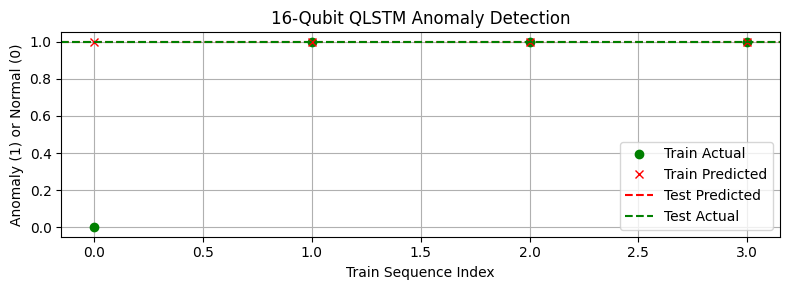

In [ ]:
# !pip install pennylane pennylane-lightning --quiet

import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set device for PyTorch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on: {device}")

# Step 1: Prepare Logs
log_sequences = [
    ["user login successful", "USB device connected", "application started successfully"],
    ["authentication failed", "CPU temperature warning", "memory leak detected"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
    ["cron job completed", "system reboot initiated", "kernel panic error"],
    ["Apache started", "child process (776) exiting unexpectedly with status 3221225477", "server auto-recovery triggered"]
]
labels = [0, 1, 1, 1, 1]

# TF-IDF
flattened = [log for seq in log_sequences for log in seq]
vectorizer = TfidfVectorizer(max_features=16)
vectorizer.fit(flattened)

def encode_sequence(seq):
    return torch.tensor(np.array([vectorizer.transform([log]).toarray()[0] for log in seq]), dtype=torch.float32)

X_seq = [encode_sequence(seq) for seq in log_sequences]
y_seq = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train = torch.stack(X_seq[:-1]).to(device)
y_train = y_seq[:-1].to(device)
X_test = X_seq[-1].unsqueeze(0).to(device)
y_test = y_seq[-1].unsqueeze(0).to(device)

# Step 2: Quantum Circuit with 16 Qubits
n_qubits = 16
dev = qml.device("lightning.qubit", wires=n_qubits)

def quantum_lstm_gate(x, weights):
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

@qml.qnode(dev, interface="torch")
def run_quantum_gate(x, weights):
    return quantum_lstm_gate(x, weights)

# Step 3: Manual QLSTM
class ManualQLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_qubits, seq_len):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.forget_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.input_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.output_weights = nn.Parameter(torch.randn((3, n_qubits)))
        self.classifier = nn.Sequential(nn.Linear(hidden_dim, 1), nn.Sigmoid())

    def forward(self, x):
        batch_size = x.size(0)
        c_t = torch.zeros((batch_size, self.hidden_dim), device=x.device)
        h_t = torch.zeros((batch_size, self.hidden_dim), device=x.device)

        for t in range(self.seq_len):
            x_t = x[:, t, :]
            f_t, i_t, o_t, c̃_t = [], [], [], []

            for i in range(batch_size):
                x_i = x_t[i].cpu()
                f = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.forget_weights), dtype=torch.float32, device=device))
                i_ = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.input_weights), dtype=torch.float32, device=device))
                o = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.output_weights), dtype=torch.float32, device=device))
                c_tilde = torch.tanh(torch.tensor(run_quantum_gate(x_i, self.input_weights), dtype=torch.float32, device=device))

                f_t.append(f)
                i_t.append(i_)
                o_t.append(o)
                c̃_t.append(c_tilde)

            f_t = torch.stack(f_t)
            i_t = torch.stack(i_t)
            o_t = torch.stack(o_t)
            c̃_t = torch.stack(c̃_t)

            c_t = f_t * c_t + i_t * c̃_t
            h_t = o_t * torch.tanh(c_t)

        return self.classifier(h_t)

# Step 4: Training
model = ManualQLSTM(input_dim=n_qubits, hidden_dim=n_qubits, n_qubits=n_qubits, seq_len=3).to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print("\nTraining 16-Qubit QLSTM...\n")
for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        acc = ((y_pred > 0.5) == y_train).float().mean()
        print(f"Epoch {epoch:02d}: Loss={loss.item():.4f}  Accuracy={acc.item():.2f}")

# Step 5: Evaluation
model.eval()
with torch.no_grad():
    train_preds = (model(X_train) > 0.5).int().flatten()
    test_pred = (model(X_test) > 0.5).int().item()

    print("\nTrain Predictions :", train_preds.tolist())
    print("Train Labels      :", y_train.int().flatten().tolist())
    print("Test Prediction   :", test_pred)
    print("Test Label        :", int(y_test.item()))

    plt.figure(figsize=(8, 3))
    plt.plot(y_train.cpu().flatten(), 'go', label="Train Actual")
    plt.plot(train_preds.cpu(), 'rx', label="Train Predicted")
    plt.axhline(test_pred, color='r', linestyle='--', label="Test Predicted")
    plt.axhline(y_test.cpu().item(), color='g', linestyle='--', label="Test Actual")
    plt.title("16-Qubit QLSTM Anomaly Detection")
    plt.xlabel("Train Sequence Index")
    plt.ylabel("Anomaly (1) or Normal (0)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


======
Note: For dmeo, The labels list is manually defined. anomaly as 1 and noraml as 0

For a large-scale real-world system, manual labeling isn't scalable — so you'd want to automate this step.

Options for Automating Labeling of Anomalies





1. Use Rule-Based Heuristics (Fast but Rigid)
Create a list of keywords or patterns that strongly correlate with anomalies:

In [ ]:
anomaly_keywords = ["failed", "error", "panic", "leak", "warning", "unauthorized", "crash"]

def is_anomaly(log_seq):
    combined = " ".join(log_seq).lower()
    return int(any(keyword in combined for keyword in anomaly_keywords))

labels = [is_anomaly(seq) for seq in log_sequences]


 2. Use a Pretrained Language Model (NLP-based Anomaly Detector)
 Apply models like BERT, RoBERTa, or even OpenAI models to classify logs based on semantic meaning:

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification", model="path/to/anomaly-detector")

def is_anomaly_model_based(log_seq):
    combined = " ".join(log_seq)
    result = classifier(combined)[0]
    return int(result["label"] == "ANOMALY")

labels = [is_anomaly_model_based(seq) for seq in log_sequences]


3. Use Log Parsing Tools or SIEM Systems
if logs from a real production system (e.g., Kubernetes, Splunk, ELK), many already attach severity metadata.
{
  "timestamp": "...",
  "message": "memory leak detected",
  "severity": "error"
}

can automatically label:
def label_from_severity(log_seq):
    # Parse severity from real metadata if available
    return int(any("error" in log.lower() or "fail" in log.lower() for log in log_seq))

labels = [label_from_severity(seq) for seq in log_sequences]


Stock predictor code

Epoch 0: Loss=0.7233 Accuracy=0.50
Epoch 5: Loss=0.7161 Accuracy=0.50
Epoch 10: Loss=0.7099 Accuracy=0.50
Epoch 15: Loss=0.7047 Accuracy=0.50
Epoch 20: Loss=0.7007 Accuracy=0.50
Epoch 25: Loss=0.6976 Accuracy=0.50

Predictions (1 = Bullish): [1, 1, 1, 1]
Ground Truth: [1, 0, 1, 0]


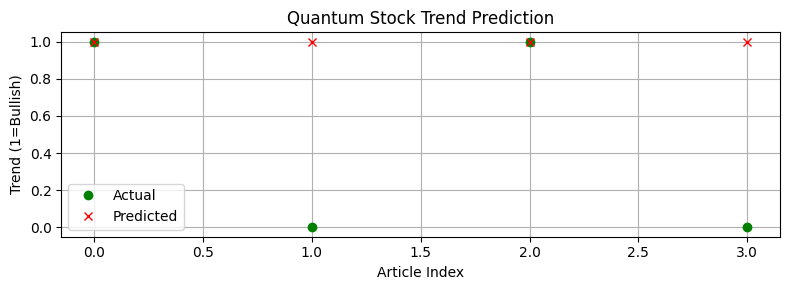


📰 Summaries:
Article 0: Apple's shares rose after the company announced stronger-than-expected earnings. Investors are optimistic about future iPhone sales.
Article 1: Tesla stock tumbled following disappointing delivery numbers. Concerns about demand in China and rising competition affected investor confidence.
Article 2: The Fed hinted at potential rate cuts later this year. This boosted the stock market, with financial and tech sectors seeing gains.
Article 3: Tech stocks faced selling pressure after Nvidia's earnings missed expectations. The company cited weak datacenter demand and supply chain delays.


In [ ]:
# ✅ Install dependencies (run once)
!pip install pennylane torch scikit-learn matplotlib --quiet

import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
import re
from typing import List

# ✅ User-pasted stock articles
articles = [
    """Apple's shares rose after the company announced stronger-than-expected earnings.
    Investors are optimistic about future iPhone sales. Analysts raised their price targets.""",

    """Tesla stock tumbled following disappointing delivery numbers.
    Concerns about demand in China and rising competition affected investor confidence.""",

    """The Fed hinted at potential rate cuts later this year.
    This boosted the stock market, with financial and tech sectors seeing gains.""",

    """Tech stocks faced selling pressure after Nvidia's earnings missed expectations.
    The company cited weak datacenter demand and supply chain delays.""",
]
labels = [1, 0, 1, 0]  # 1 = Bullish, 0 = Bearish

# ✅ Clean and encode article into 3-sentence sequences
def clean_sentences(text: str) -> List[str]:
    lines = [l.strip() for l in re.split(r'\.|\n', text) if l.strip()]
    return lines[:3] if len(lines) >= 3 else lines + [""] * (3 - len(lines))

flattened_sentences = [sent for article in articles for sent in clean_sentences(article)]
vectorizer = TfidfVectorizer(max_features=4)
vectorizer.fit(flattened_sentences)

def encode_article(article):
    sents = clean_sentences(article)
    return torch.tensor(np.array([vectorizer.transform([s]).toarray()[0] for s in sents]), dtype=torch.float32)

X_seq = [encode_article(article) for article in articles]
X_tensor = torch.stack(X_seq)
y_tensor = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# ✅ Quantum setup
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

def quantum_lstm_gate(x, weights):
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

@qml.qnode(dev, interface="torch")
def run_quantum_gate(x, weights):
    return quantum_lstm_gate(x, weights)

# ✅ QLSTM model
class QuantumStockPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_qubits, seq_len):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.fw = nn.Parameter(torch.randn((3, n_qubits)))
        self.iw = nn.Parameter(torch.randn((3, n_qubits)))
        self.ow = nn.Parameter(torch.randn((3, n_qubits)))
        self.fc = nn.Sequential(nn.Linear(hidden_dim, 1), nn.Sigmoid())

    def forward(self, x):
        B = x.size(0)
        c_t = torch.zeros((B, self.hidden_dim))
        h_t = torch.zeros((B, self.hidden_dim))

        for t in range(self.seq_len):
            x_t = x[:, t, :]
            f_t, i_t, o_t, c̃_t = [], [], [], []

            for i in range(B):
                x_i = x_t[i]
                f = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.fw), dtype=torch.float32))
                i_ = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.iw), dtype=torch.float32))
                o = torch.sigmoid(torch.tensor(run_quantum_gate(x_i, self.ow), dtype=torch.float32))
                c_tilde = torch.tanh(torch.tensor(run_quantum_gate(x_i, self.iw), dtype=torch.float32))

                f_t.append(f)
                i_t.append(i_)
                o_t.append(o)
                c̃_t.append(c_tilde)

            f_t = torch.stack(f_t)
            i_t = torch.stack(i_t)
            o_t = torch.stack(o_t)
            c̃_t = torch.stack(c̃_t)

            c_t = f_t * c_t + i_t * c̃_t
            h_t = o_t * torch.tanh(c_t)

        return self.fc(h_t)

# ✅ Training
model = QuantumStockPredictor(input_dim=4, hidden_dim=4, n_qubits=n_qubits, seq_len=3)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        acc = ((y_pred > 0.5) == y_tensor).float().mean()
        print(f"Epoch {epoch}: Loss={loss.item():.4f} Accuracy={acc.item():.2f}")

# ✅ Evaluation
model.eval()
with torch.no_grad():
    preds = (model(X_tensor) > 0.5).int().flatten()
    print("\nPredictions (1 = Bullish):", preds.tolist())
    print("Ground Truth:", y_tensor.int().flatten().tolist())

    plt.figure(figsize=(8, 3))
    plt.plot(y_tensor.flatten(), 'go', label="Actual")
    plt.plot(preds, 'rx', label="Predicted")
    plt.title("Quantum Stock Trend Prediction")
    plt.xlabel("Article Index")
    plt.ylabel("Trend (1=Bullish)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ✅ Optional: Simple summarizer
def simple_summary(article):
    sents = clean_sentences(article)
    vect = CountVectorizer().fit(sents)
    X = vect.transform(sents).toarray().sum(axis=1)
    best = np.argsort(X)[::-1][:2]
    return ". ".join([sents[i] for i in sorted(best)])

print("\n📰 Summaries:")
for i, art in enumerate(articles):
    print(f"Article {i}: {simple_summary(art)}.")